# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 1 : Reservas de Hotel</center>
## <center>Checkpoint 3</center>
### <center>Redes Neuronales</center>

#### Integrantes grupo 19: Sudanalytics 
* Adrian Leandro Re
* Alan Toulouse
* Luciano Lorenzo
* Nicolas Tonizzo

## Ensamble híbrido
Cargaremos los modelos creados con las notebooks anteriores usando la libreria pickle

In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf

In [2]:
df = pd.read_csv("../dataset/hotels_train_procesado.csv")
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'id', 'is_canceled', 'hotel_encoding',
       'tiene_hijos', 'es_extranjero', 'es_portugues', 'es_ingles',
       'es_frances', 'es_espanol', 'es_aleman', 'reserved_room_was_assigned',
       'required_a_car_parking_space', 'solo_desayuna_en_el_hotel',
       'pidio_todas_comidas', 'reservo_online', 'reservo_en_grupo',
       'reservo_sin_reembols

Declaramos el target y los features del dataframe que vamos a utilizar para predecir.

In [3]:
target = "is_canceled"

attrs = [
    "hotel_encoding",
    
    "lead_time",
    "reservo_el_mismo_dia",
    "adr",

    "stays_in_weekend_nights",
    "stays_in_week_nights",

    "tiene_hijos",
    "adults",
    #"children",
    #"babies",

    # Fechas
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "arrival_date_year",

    "es_extranjero",
    #"es_portugues",
    #"es_ingles",
    #"es_frances",
    #"es_espanol",
    #es_aleman",

    "reserved_room_was_assigned",

    "is_repeated_guest",
    "previous_cancellations", 
    #"previous_bookings_not_canceled",
    "total_reservas_previas",
    "total_of_special_requests",
    "booking_changes",

    # 'meal',
    "solo_desayuna_en_el_hotel",
    "pidio_todas_comidas",

    'required_car_parking_spaces',
    "required_a_car_parking_space",

    "reservo_sin_reembolso",
    "reservo_sin_depositar",
    "reservo_online",
    "reservo_en_grupo",
    "reservo_sin_compania",
    "reservo_sin_agente",
    "reservo_sin_paquete",
    
    "days_in_waiting_list",
    "tuvo_dias_de_espera",
    
    "agent9",
    "agent240",
    "agent1",
    "agent14",
    "agent6",
]

**Dividimos el dataset en entrenamiento y validacion**, para poder validar que no estamos overfitteando al dataset de entrenamiento, y que los modelos van a predecir bien a registros no vistos anteriormente. 

In [4]:
X = df[attrs].values
y = df[target].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, shuffle=True)
X_train.shape

(30956, 36)

In [74]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(400, input_shape=X[1,:].shape, activation=keras.activations.elu))
model.add(keras.layers.Dense(250, activation=keras.activations.elu))
model.add(keras.layers.Dense(250, activation=keras.activations.elu))
model.add(keras.layers.Dense(50, activation=keras.activations.relu))
model.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

In [75]:
model.compile(loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adagrad(learning_rate=0.01),
    metrics=[keras.metrics.sparse_categorical_accuracy]
)
model.summary() 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 400)               14800     
                                                                 
 dense_30 (Dense)            (None, 250)               100250    
                                                                 
 dense_31 (Dense)            (None, 250)               62750     
                                                                 
 dense_32 (Dense)            (None, 50)                12550     
                                                                 
 dense_33 (Dense)            (None, 1)                 51        
                                                                 
Total params: 190,401
Trainable params: 190,401
Non-trainable params: 0
_________________________________________________________________


In [70]:
history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=45,
                    validation_data=(X_val, y_val),
                    callbacks = [keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)])

Epoch 1/25
688/688 [==============================] - 7s 10ms/step - loss: 0.2724 - sparse_categorical_accuracy: 0.5005 - val_loss: 0.2998 - val_sparse_categorical_accuracy: 0.5000
Epoch 2/25
688/688 [==============================] - 7s 10ms/step - loss: 0.2713 - sparse_categorical_accuracy: 0.5005 - val_loss: 0.2994 - val_sparse_categorical_accuracy: 0.5000
Epoch 3/25
688/688 [==============================] - 9s 13ms/step - loss: 0.2704 - sparse_categorical_accuracy: 0.5005 - val_loss: 0.2993 - val_sparse_categorical_accuracy: 0.5000
Epoch 4/25
688/688 [==============================] - 10s 14ms/step - loss: 0.2695 - sparse_categorical_accuracy: 0.5005 - val_loss: 0.2991 - val_sparse_categorical_accuracy: 0.5000
Epoch 5/25
688/688 [==============================] - 13s 18ms/step - loss: 0.2682 - sparse_categorical_accuracy: 0.5005 - val_loss: 0.2978 - val_sparse_categorical_accuracy: 0.5000
Epoch 6/25
688/688 [==============================] - 10s 14ms/step - loss: 0.2673 - sparse_c

In [71]:
# Test, Loss and accuracy
loss_and_metrics = model.evaluate(X_val, y_val)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

968/968 [==============================] - 3s 3ms/step - loss: 0.2943 - sparse_categorical_accuracy: 0.5000
Loss =  0.2943118214607239
Accuracy =  0.49998384714126587


In [72]:
y_pred = model.predict(X_val)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print("f1 score sobre validacion:", f1_score(y_val, y_pred))

968/968 [==============================] - 3s 3ms/step
f1 score sobre validacion: 0.8635070787127288


In [73]:
y_pred = model.predict(X_train)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print("f1 score sobre train:", f1_score(y_train, y_pred))

968/968 [==============================] - 2s 3ms/step
f1 score sobre train: 0.8831841432225064


## Matrices de confusion

Ploteamos la confusion matrix del set de entrenamiento

968/968 [==============================] - 3s 3ms/step


Text(0.5, 1.0, 'Confusion matrix de training set')

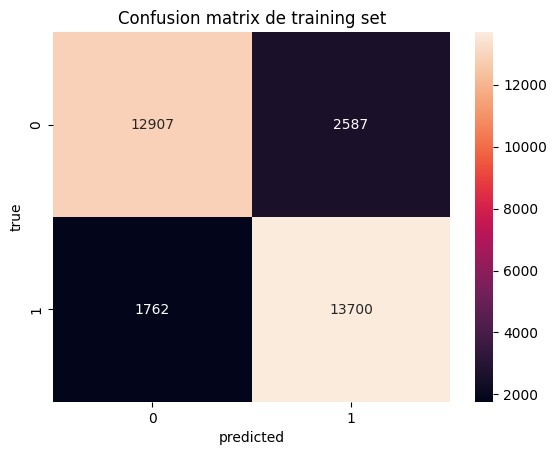

In [11]:
y_pred = np.where(model.predict(X_train) >= 0.5, 1, 0)
confusion = confusion_matrix(y_train, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix de training set")

Ploteamos la confusion matrix del set de validación

968/968 [==============================] - 3s 3ms/step


Text(0.5, 1.0, 'Confusion matrix del validation set (voting)')

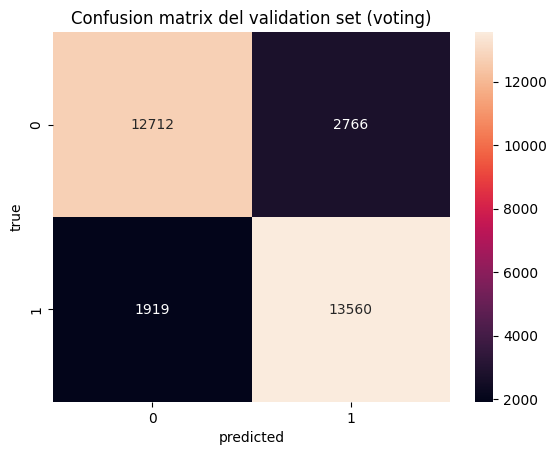

In [12]:
y_pred = np.where(model.predict(X_val) >= 0.5, 1, 0)
confusion = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix del validation set (voting)")

## busqueda hiperparametros

para la busqueda de hiperparemetros creamos un modelo mas simple que el anterior para que no tarde tanto tiempo en ejecutarse

In [20]:
def create_model():
    modelo = keras.Sequential()
    modelo.add(keras.layers.Dense(8, activation='relu', input_shape=(36,)))
    modelo.add(keras.layers.Dense(1, activation='sigmoid'))
    modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return modelo

modelo = KerasClassifier(build_fn = create_model)


epochs = [5,10,25]
batches = [50, 20, 10]

param_grid = dict( epochs=epochs, batch_size=batches)


grid = RandomizedSearchCV(
    estimator=modelo,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)
grid_result = grid.fit(X_train, y_train)

C:\Users\ecalpao\AppData\Local\Temp\ipykernel_19000\1834910444.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo = KerasClassifier(build_fn = create_model)
c:\Users\ecalpao\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Epoch 1/25
1548/1548 [==============================] - 8s 4ms/step - loss: 0.4501 - accuracy: 0.7781
Epoch 2/25
1548/1548 [==============================] - 6s 4ms/step - loss: 0.3599 - accuracy: 0.8326
Epoch 3/25
1548/1548 [==============================] - 4s 3ms/step - loss: 0.3490 - accuracy: 0.8368
Epoch 4/25
1548/1548 [==============================] - 4s 3ms/step - loss: 0.3433 - accuracy: 0.8366
Epoch 5/25
1548/1548 [==============================] - 4s 3ms/step - loss: 0.3391 - accuracy: 0.8377
Epoch 6/25
1548/1548 [==============================] - 4s 2ms/step - loss: 0.3364 - accuracy: 0.8390
Epoch 7/25
1548/1548 [==============================] - 4s 3ms/step - loss: 0.3342 - accuracy: 0.8406
Epoch 8/25
1548/1548 [==============================] - 4s 3ms/step - loss: 0.3323 - accuracy: 0.8415
Epoch 9/25
1548/1548 [==============================] - 4s 3ms/step - loss: 0.3305 - accuracy: 0.8418
Epoch 10/25
1548/1548 [==============================] - 5s 3ms/step - loss: 0.328

In [21]:

print("Mejor modelo: %f %s" % (grid_result.best_score_, grid_result.best_params_))


Mejor modelo: 0.844715 {'epochs': 25, 'batch_size': 20}


In [22]:
y_p =grid.predict(X_val)
y_p

968/968 [==============================] - 3s 3ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

Ploteamos la confusion matrix del set de entrenamiento

968/968 [==============================] - 2s 2ms/step


Text(0.5, 1.0, 'Confusion matrix de training set')

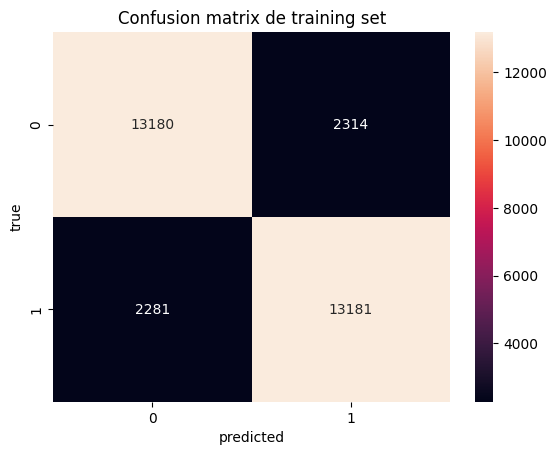

In [23]:
y_pred = np.where(grid.predict(X_train) >= 0.5, 1, 0)
confusion = confusion_matrix(y_train, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix de training set")

como podemos ver aqui, la busqueda de hiperparametros no fue muy efectiva ya que debimos sacrificar una buena parte en la creacion del modelo, y los parametros que encontramos no sirven tanto como para que este nuevo modelo mas simple sea mejor que el previo

para encontrar un modelo mejor que el nuestro buscando hiperparametros con grid/random search, el tiempo de ejecucion debe ser muy alto por lo que no consideramos que valga la pena, ya que tampoco es mucho mejor.

# Creacion de submit

In [24]:
def create_submission(model): 
    df_test = pd.read_csv("../dataset/hotels_test_procesado.csv")
    assert(len(df_test)==26535)

    X = df_test[attrs].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    prediccion = np.where(model.predict(X) >= 0.5, 1, 0)

    assert(len(prediccion)==26535)

    submit = pd.DataFrame(
        {"is_canceled": prediccion[:,0]},
        index=df_test["id"],
    )
    assert(len(submit)==26535)

    submit.to_csv("../dataset/submit.csv")

In [76]:
## antes hay que pasarlo por el standard scaler, o hacer una pipe
create_submission(model)

830/830 [==============================] - 3s 3ms/step


# Guardamos modelo en pickle

In [26]:
with open('../modelos/NN.pickle', 'wb') as file:
    pickle.dump(model, file)